# CodSoft Task 1
# TITANIC SURVIVAL PREDICTION

# step 1: Domain problem

In [1]:
from IPython.display import Image # using for displaying image
Image(url='https://ultimatetitanic.com/wp-content/uploads/2021/04/TItanic-Survival-Infographic-1024x525.jpg')

Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The disaster was caused by a combination of factors, including the ship's speed, the lack of lifeboats, and the failure to heed warnings about ice in the area.

###### In this domain we will analyze dataset of titanic to apply tools of machine learning for getting best accuracy to predict which passengers survived

## 

# Step 2: collecting data

# import the libraries needed to work

#### Pandas: for reading csv file & visualizing data, such as creating line plots, bar charts, and histograms.
#### NumPy: provides a wide range of mathematical operations as linear algebra operations.
#### Matplotlib: for data visualization.
#### Seaborn: for statistical data visualization.
#### %matplotlib inline: #To ensure that the visualized will appear on the same notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# reading csv file and show dataset

In [3]:
df= pd.read_csv("tested.csv")

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### Explaining each element in dataset
#### survived column = { survival=1 , dead =0}
#### Pclass column = {1= class 1 , 2= class 2 , 3= class 3}
#### sex column = {male= Men , female= Women}
#### sibsp column = Number of Siblings/Spouses 
#### parch column = Number of Parents/Children 
#### Ticket column = Ticket's Number
#### Fare column = British pound
#### cabin column = cabin's Number
#### Embarked column = {C= Cherbourg , Q= Queenstown , S= Southampton}

## 

In [4]:
# shape of dataset
df.shape

(418, 12)

#### dataset include 12 columns and 418 rows

#### 

## get main information about data and check missing data

In [5]:
# information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
# Missing data

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### above information explain that dataset including missing data in (Age, Fare, Cabin) columns
#### Age= 86 , Fare= 1 , Cabin= 327

## summary of the existing statistical values using describe

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### explain main points from Above table 
#### the mean survival rate was 36.36 and standard deviation rate was 48.16.
#### the mean Age rate was 30.27 and standard deviation rate was 14.18.
#### Ages range between 0.17 and 76.

## 

# Step 3: data cleaning

### for removing missing data in cabin by replacing cabin col. with new col. name is cabingroup using first letter of each row and by using this way can raplace any missing data with unknown letter as "U"

In [8]:
def groupCabins(cabin):
    
    if(pd.notnull(cabin)):
        
        return cabin[0]
    
    else:
        
        return "U" # for Unknown 

df['CabinGroup'] = df['Cabin'].apply(groupCabins)

### drop cabin col.

In [9]:
df.drop('Cabin',axis=1,inplace=True)

### check missing data

In [10]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
CabinGroup      0
dtype: int64

### removing missing data in Age and Fare Col. by using mean

In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [12]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

### check missing data

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
CabinGroup     0
dtype: int64

In [14]:
# information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
 11  CabinGroup   418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [15]:
# shape of dataset
df.shape

(418, 12)

In [16]:
# display fisrt 5 rows of data 

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinGroup
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,U
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,U
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,U
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,U
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,U


## 

# Step 4: Data visualizaton

Survived
0    266
1    152
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

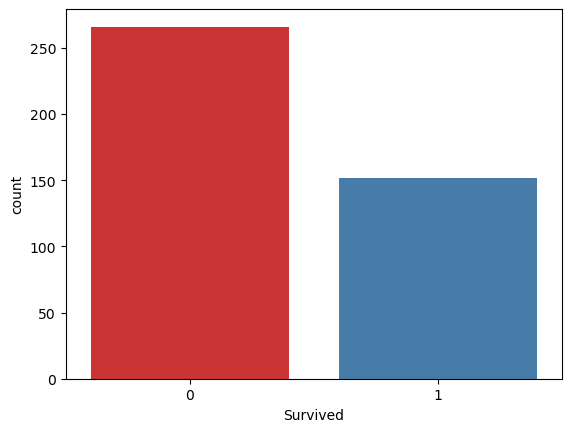

In [17]:
# 1- How many passenger died and how many passenger lived?

count=df['Survived'].value_counts()
print(count)

# Using charts
sns.countplot(x='Survived',data=df,palette='Set1')

#### from above chart explain that no. of died > no. of survived
#### 63.64% died
#### 36.36% survived

##

Sex
male      266
female    152
Name: count, dtype: int64


<Axes: xlabel='Sex', ylabel='count'>

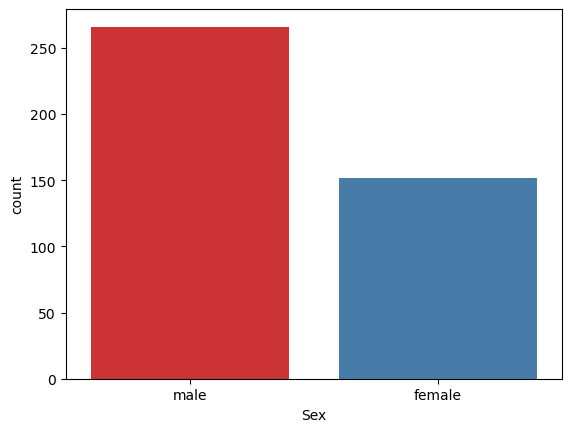

In [18]:
# 2- How many Female and Male in the ship ?

# The number of Female and Male in ship
gender=df['Sex'].value_counts()
print(gender)

# Using charts
sns.countplot(x='Sex',data=df,palette='Set1')

#### from above chart explain that no. of males > no. of females
#### 63.64% male
#### 36.36% female

##

      Sex  Survived  count
0  female         1    152
1    male         0    266


<Axes: xlabel='Sex', ylabel='count'>

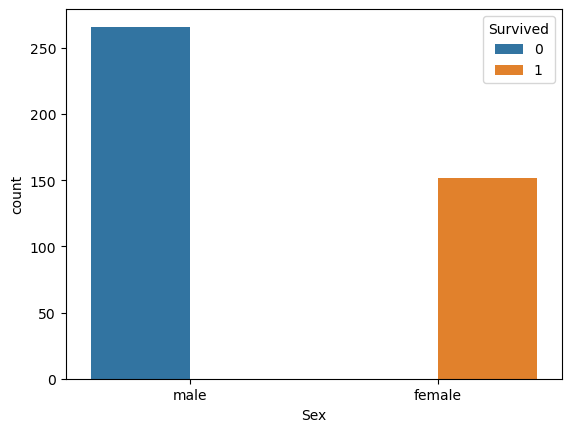

In [19]:
# 3- How many survived Female and how many survived Male?

gendersurvived =df[['Sex', 'Survived']].groupby('Sex', as_index=False).value_counts()
print(gendersurvived)

# Using charts
sns.countplot(x='Sex',data=df,hue='Survived')

#### from above chart explain that all of the male died
#### 63.64% male died 
#### 36.36% female survived

##

Pclass
3    218
1    107
2     93
Name: count, dtype: int64


<Axes: xlabel='Pclass', ylabel='count'>

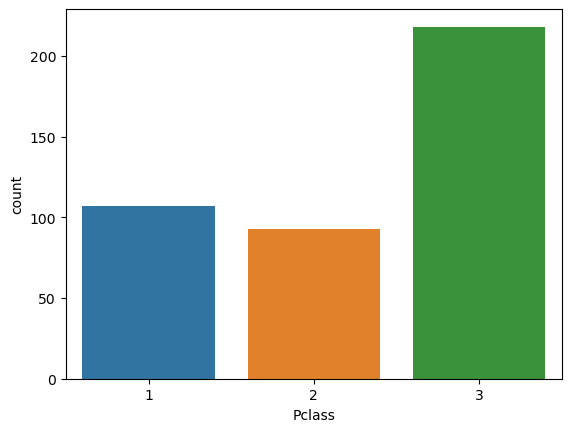

In [20]:
# 4- How many classes are in the ship using charts ?

# How many Passenger in each class ?
count=df['Pclass'].value_counts()
print(count)

# Using charts
sns.countplot(x='Pclass',data=df)

#### 25.60% class 1
#### 22.25% class 2
#### 52.15% class 3

##

   Pclass  Survived  count
0       1         0     57
1       1         1     50
2       2         0     63
3       2         1     30
4       3         0    146
5       3         1     72


<Axes: xlabel='Pclass', ylabel='count'>

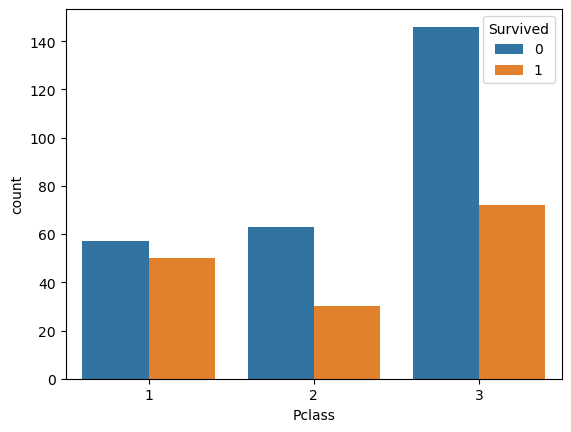

In [21]:
# 6- How many survived passenger in each class?

classsurvived = df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).value_counts()
print(classsurvived)

# Using charts
sns.countplot(x='Pclass',data=df,hue='Survived')

### Output
##### This shows that most of the people who survived were from the third class
##### And  most of the people who dieded were from the third class 

#### 

   Pclass     Sex  count
0       1    male     57
1       1  female     50
2       2    male     63
3       2  female     30
4       3    male    146
5       3  female     72


<Axes: xlabel='Pclass', ylabel='count'>

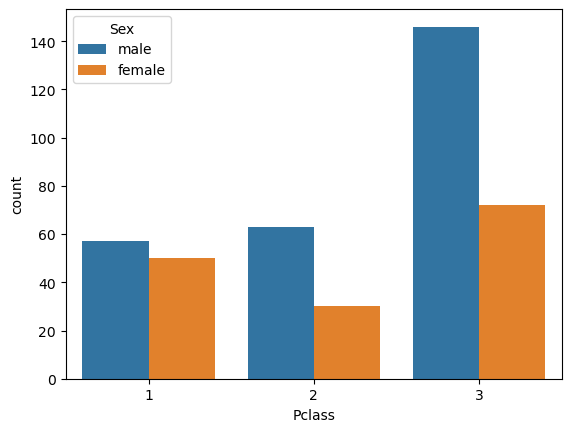

In [22]:
# 7- How many Female and Male in each class?

classgender= df[['Pclass', 'Sex']].groupby('Pclass', as_index=False).value_counts()
print(classgender)

# Using charts
sns.countplot(x='Pclass',data=df,hue='Sex')

### Output
#### the most of males and females who were in the third class

#### 

In [23]:
# 8- What is the most frequent age on a ship?
df['Age'].value_counts()

Age
30.27259    86
24.00000    17
21.00000    17
22.00000    16
30.00000    15
            ..
76.00000     1
28.50000     1
22.50000     1
62.00000     1
38.50000     1
Name: count, Length: 80, dtype: int64

### Most amount of passengers in Age= 30,24,21 

##### 

In [24]:
# 9- classification range  of age

def ranges(passenger):
    # Take the Age and Sex
    
    age,passengerId = passenger
    # found the range of ages for passengers
    
    if age <= 20.00 :
        return '0 to 20'
    elif age > 20.00 and age <=40 :
        return '21 to 40'
    elif age > 40.00 and age<=60:
        return '41 to 60'
    else:
        return 'greater than 60'
    

# We'll define a new column called 'person', remember to specify axis=1 for columns and not index

df['person'] = df[['Age','PassengerId']].apply(ranges,axis=1)

In [25]:
# explore most head of data 

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinGroup,person
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,U,21 to 40
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,U,41 to 60
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,U,greater than 60
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,U,21 to 40
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,U,21 to 40


<Axes: xlabel='person', ylabel='count'>

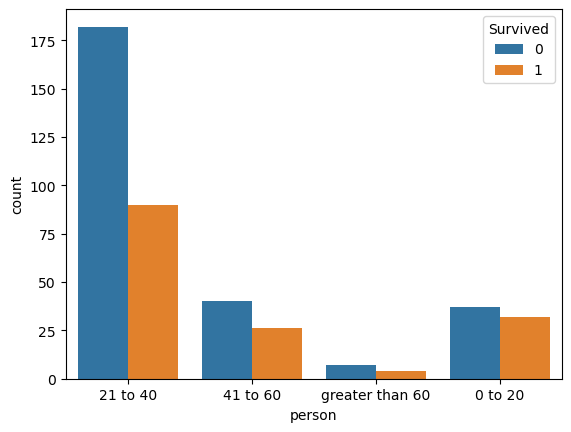

In [26]:
# 10- How many passenger survived from each range of age?

sns.countplot(x='person',data=df,hue='Survived')

#### the most amount of dead's passengers in ages from 21 to 40

#### 

<Axes: xlabel='person', ylabel='count'>

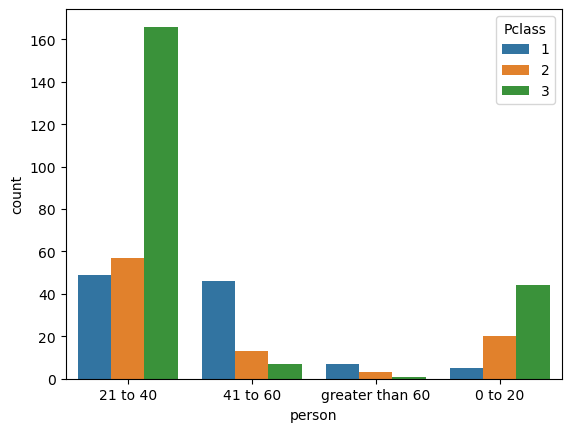

In [27]:
# 11- How many passenger in each class from each range of age?

sns.countplot(x='person',data=df,hue='Pclass')

#### the most amount of passengers in ages from 21 to 40 and the most amount of them in class-3

#### 

In [28]:
# 12- How many single person on the ship?

# I will make a new column called Alone equals sumation of column parch and column SipSp

df['Status'] = df.Parch + df.SibSp
df['Status']

0      0
1      1
2      0
3      0
4      2
      ..
413    0
414    0
415    0
416    0
417    2
Name: Status, Length: 418, dtype: int64

In [29]:
# Look for ==0 to set alone status
#Look for > 0 to set With family status

df['Status'].loc[df['Status'] >0] = 'With Family'
df['Status'].loc[df['Status'] == 0] = 'Alone'

C:\Users\ABD ALRHMAN\AppData\Local\Temp\ipykernel_2972\3808577968.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'].loc[df['Status'] >0] = 'With Family'


In [30]:
# explore most head of data 

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinGroup,person,Status
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,U,21 to 40,Alone
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,U,41 to 60,With Family
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,U,greater than 60,Alone
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,U,21 to 40,Alone
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,U,21 to 40,With Family


Status
Alone          253
With Family    165
Name: count, dtype: int64


<Axes: xlabel='Status', ylabel='count'>

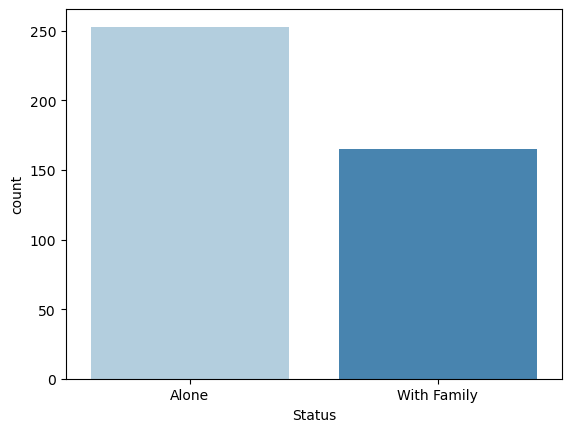

In [31]:
# The number of single person on the ship

status= df['Status'].value_counts()
print(status)

# # Using charts
sns.countplot(x='Status',data=df,palette='Blues')

### Output
#### 60.53 alone
#### 39.47 with fanily

##### 

        Status  Survived  count
0        Alone         0    185
1        Alone         1     68
2  With Family         1     84
3  With Family         0     81


<Axes: xlabel='Status', ylabel='count'>

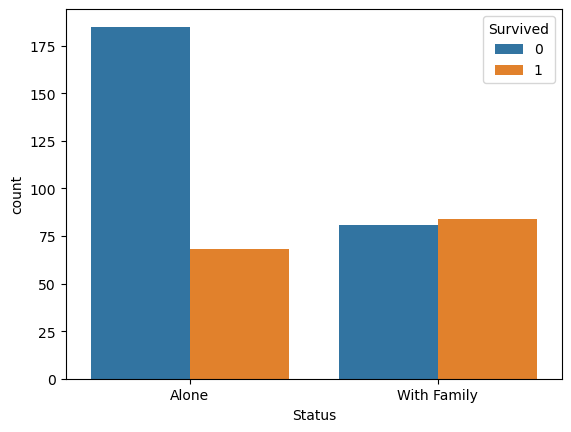

In [32]:
# 13- How many single person survived ?

alonesurvived= df[['Status', 'Survived']].groupby('Status', as_index=False).value_counts()
print(alonesurvived)

# Using charts
sns.countplot(x='Status',data=df,hue='Survived')

#### the most people who were died Alone
#### the most people who were survived with family

# 

   Pclass       Status  count
0       1  With Family     56
1       1        Alone     51
2       2        Alone     54
3       2  With Family     39
4       3        Alone    148
5       3  With Family     70


<Axes: xlabel='Pclass', ylabel='count'>

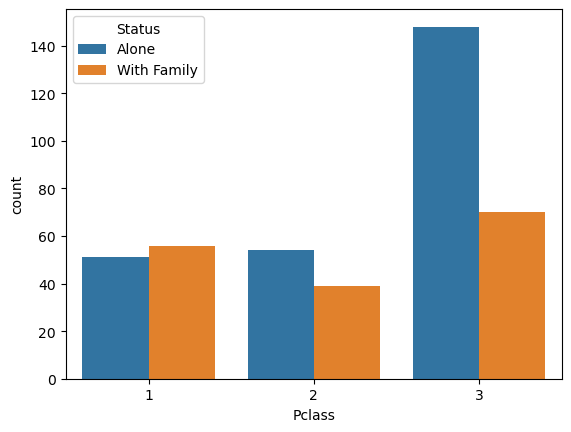

In [33]:
# 14-  How many single peaple in each class?  

classalone=df[['Pclass', 'Status']].groupby('Pclass', as_index=False).value_counts()
print(classalone)

# Using charts
sns.countplot(x='Pclass',data=df,hue='Status')

#### the most people alone and with family who were in the third class

# 

<Axes: xlabel='Embarked', ylabel='count'>

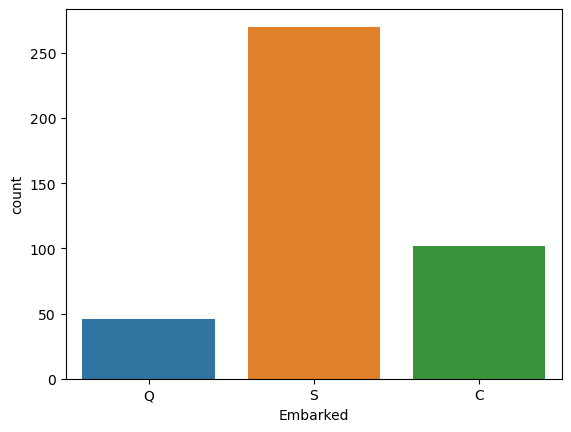

In [34]:
# 15 - How many  passenger from each embarked station?
df['Embarked'].value_counts()

# 16 - How many embarked?
# Embarked implies where the traveler mounted from. 

sns.countplot(x='Embarked',data=df)

#### the most people were from embarked S

# 

  Embarked  Survived  count
0        C         0     62
1        C         1     40
2        Q         1     24
3        Q         0     22
4        S         0    182
5        S         1     88


<Axes: xlabel='Embarked', ylabel='count'>

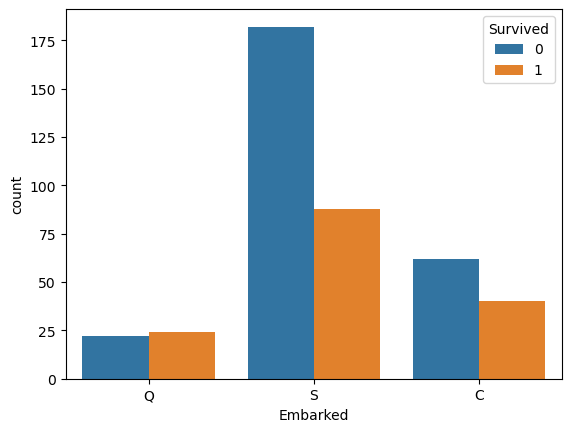

In [35]:
# 17- How many survived passenger from each embarked station?

embarkedsurvived= df[['Embarked', 'Survived']].groupby('Embarked', as_index=False).value_counts()
print(embarkedsurvived)

# Using charts
sns.countplot(x='Embarked',data=df,hue='Survived')

#### the most people who were died from embarked s

# 

  Embarked     Sex  count
0        C    male     62
1        C  female     40
2        Q  female     24
3        Q    male     22
4        S    male    182
5        S  female     88


<Axes: xlabel='Embarked', ylabel='count'>

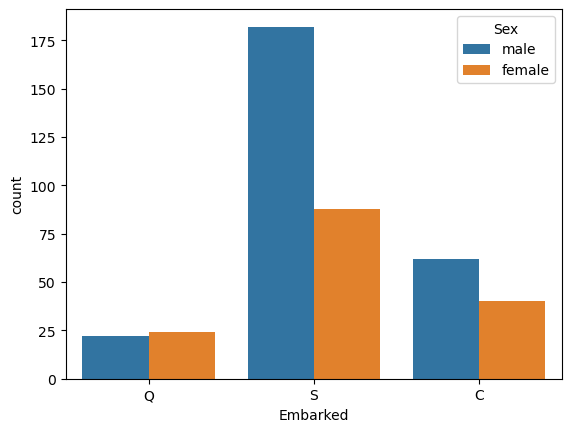

In [36]:
# 18- How many Female and Male get on board the ship from each embarked station?

Embarkedsex= df[['Embarked', 'Sex']].groupby('Embarked', as_index=False).value_counts()
print(Embarkedsex)

# Using charts
sns.countplot(x='Embarked',data=df,hue='Sex')

#### the most males and females from embarked s

# 

  Embarked       Status  count
0        C  With Family     52
1        C        Alone     50
2        Q        Alone     41
3        Q  With Family      5
4        S        Alone    162
5        S  With Family    108


<Axes: xlabel='Embarked', ylabel='count'>

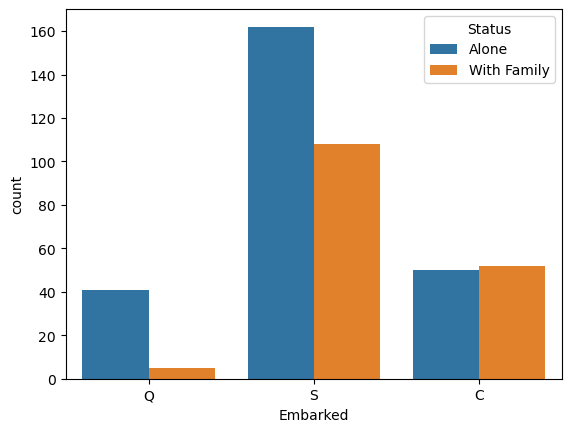

In [37]:
# 19- How single people get on board the ship from each embarked station

embarkedalone = df[['Embarked', 'Status']].groupby('Embarked', as_index=False).value_counts()
print(embarkedalone)

# Using charts
sns.countplot(x='Embarked',data=df,hue='Status')

#### the most people alone and with family from embarked s

# 

<Axes: xlabel='Pclass', ylabel='count'>

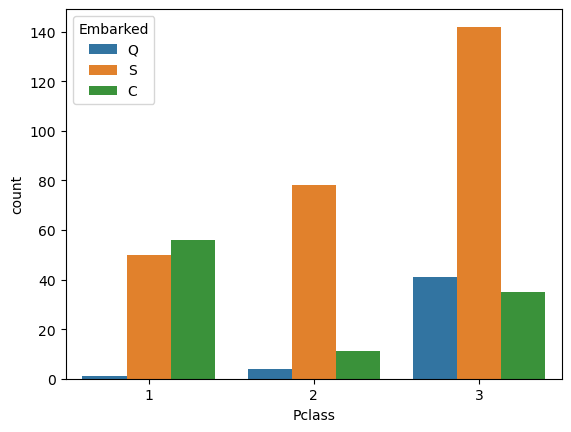

In [38]:
# 20- What is the relationship between class and embarked?

embarkedclass= df[['Embarked', 'Pclass']].groupby('Pclass', as_index=False).value_counts()

# Using charts
sns.countplot(x='Pclass',data=df,hue='Embarked')

<Axes: xlabel='CabinGroup', ylabel='count'>

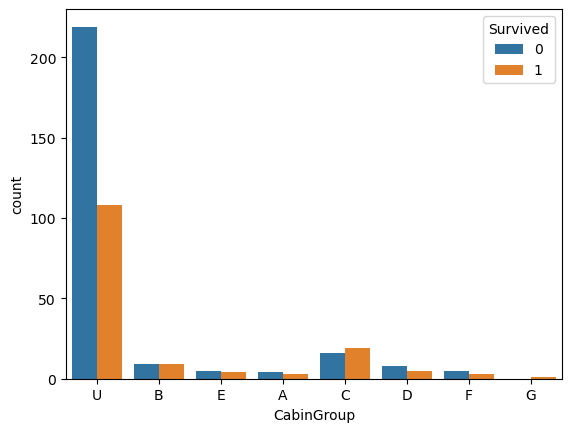

In [39]:
sns.countplot(x='CabinGroup', data= df ,hue="Survived" ,dodge=True)

#### Most of the passengers are unknown the cabin
#### the most amount of survival's passengers in cabins(C , B)

# 

In [40]:
# explore most head of data 

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinGroup,person,Status
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,U,21 to 40,Alone
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,U,41 to 60,With Family
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,U,greater than 60,Alone
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,U,21 to 40,Alone
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,U,21 to 40,With Family


In [41]:
#remove unNeeded columns 
 
#Ticket => No need for now
#Name => No need for now
#SibSp => Replaced by Alone
#Parch => Replaced by Alone
df.drop('Ticket',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)

In [42]:
#Get dummies for convert object colums into zero and one 

df= pd.get_dummies( df ,columns=['Sex','Embarked','Status','CabinGroup','person'], drop_first=True)

In [43]:
# explore most head of data 

df.head()

,PassengerId,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Status_With Family,CabinGroup_B,CabinGroup_C,CabinGroup_D,CabinGroup_E,CabinGroup_F,CabinGroup_G,CabinGroup_U,person_21 to 40,person_41 to 60,person_greater than 60
0,892,0,3,34.5,7.8292,True,True,False,False,False,False,False,False,False,False,True,True,False,False
1,893,1,3,47.0,7.0000,False,False,True,True,False,False,False,False,False,False,True,False,True,False
2,894,0,2,62.0,9.6875,True,True,False,False,False,False,False,False,False,False,True,False,False,True
3,895,0,3,27.0,8.6625,True,False,True,False,False,False,False,False,False,False,True,True,False,False
4,896,1,3,22.0,12.2875,False,False,True,True,False,False,False,False,False,False,True,True,False,False


## 

# step 5: Machine Learning model

### LogisticRegression

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Split the data into features (X) and target (y)
X = df.drop(columns=["PassengerId", "Survived"])
y = df["Survived"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Generate a classification report for logistic regression
report = classification_report(y_test, y_pred)
print("Logistic Regression Classification Report:\n", report)

Logistic Regression Accuracy: 1.00
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### DecisionTree 

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

# Generate classification reports for Decision Tree model
report_dt = classification_report(y_test, dt_model.predict(X_test))

print("Decision Tree Classification Report:\n", report_dt)

Decision Tree Accuracy: 1.00
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



### RandomForest

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Generate a classification report for Random Forest model
report_rf = classification_report(y_test, rf_model.predict(X_test))
print("Random Forest Classification Report:\n", report_rf)

Random Forest Accuracy: 1.00
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



### SVC

In [47]:
from sklearn.svm import SVC

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# Generate a classification report for SVM
report_svm = classification_report(y_test, svm_model.predict(X_test))
print("SVM Classification Report:\n", report_svm)

SVM Accuracy: 0.61
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.98      0.75        50
           1       0.67      0.06      0.11        34

    accuracy                           0.61        84
   macro avg       0.64      0.52      0.43        84
weighted avg       0.63      0.61      0.49        84



### the difference between models accuracies

In [48]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
}

# Train models and calculate accuracies
accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

# Create a DataFrame to display the results
accuracy_df = pd.DataFrame({'Model': list(accuracies.keys()), 'Accuracy': list(accuracies.values())})

# Sort the DataFrame by accuracy
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Display the table
print(accuracy_df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy
0  Logistic Regression  1.000000
1        Decision Tree  1.000000
2        Random Forest  1.000000
3                  SVM  0.607143
